In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

## Overfitting Demonstration and Early Stopping

In [2]:
# 1. Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalise the dataset
x_train = x_train / 255.0
x_test = x_test / 255.0

# Flatten images
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

# Use only a small subset to induce overfitting
x_train_small = x_train[:2000]
y_train_small = y_train[:2000]

In [3]:
# 2. Build MLP model
def build_mlp():
  model = models.Sequential([
      layers.Input(shape=(28*28,)),
      layers.Dense(512, activation='relu'),
      layers.Dense(256, activation='relu'),
      layers.Dense(10, activation='softmax')
  ])

  model.compile(
      optimizer='adam',
      loss = 'sparse_categorical_crossentropy',
      metrics = ['accuracy']
      )

  return model

### 1. Train without Early Stopping

In [4]:
# 3. Train without EarlyStopping
print("\nTraining without EarlyStopping")
model_no_es = build_mlp()
history_no_es = model_no_es.fit(x_train_small, y_train_small,
                    epochs = 200, batch_size = 32,
                    validation_split=0.2,
                    verbose=1)
print("Training finished.")


Training without EarlyStopping


2025-10-21 15:13:02.730633: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-10-21 15:13:02.730943: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-10-21 15:13:02.730970: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-10-21 15:13:02.731260: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-10-21 15:13:02.731317: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/200


2025-10-21 15:13:04.061676: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.7300 - loss: 0.8705 - val_accuracy: 0.8425 - val_loss: 0.4343
Epoch 2/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8756 - loss: 0.4190 - val_accuracy: 0.8700 - val_loss: 0.3852
Epoch 3/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9081 - loss: 0.3059 - val_accuracy: 0.9000 - val_loss: 0.3631
Epoch 4/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9056 - loss: 0.3002 - val_accuracy: 0.8950 - val_loss: 0.3942
Epoch 5/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9169 - loss: 0.2614 - val_accuracy: 0.8625 - val_loss: 0.4736
Epoch 6/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9231 - loss: 0.2579 - val_accuracy: 0.8775 - val_loss: 0.4587
Epoch 7/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9187 - loss: 0.2728 - val_accuracy: 0.8700 - val_loss: 0.5412
Epoch 8/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9031 - loss: 0.3120 - val_accuracy: 0.8875 - val_l

### 2. Train with Early Stopping

In [5]:
# 4. Train with EarlyStopping
print("\nTraining with EarlyStopping")
model_with_es = build_mlp()

# Define the early stopping callback
# We monitor 'val_loss', wait 10 epochs (patience) before stopping,
# and restore the weights from the best epoch.
early_stopping_callback = EarlyStopping(monitor='val_loss', 
                                      patience=10, 
                                      restore_best_weights=True)

history_with_es = model_with_es.fit(x_train_small, y_train_small,
                    epochs = 200, batch_size = 32,
                    validation_split=0.2,
                    verbose=1,
                    callbacks=[early_stopping_callback]) # Add the callback here
print("Training finished.")


Training with EarlyStopping
Epoch 1/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7369 - loss: 0.8563 - val_accuracy: 0.8325 - val_loss: 0.4889
Epoch 2/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8788 - loss: 0.4145 - val_accuracy: 0.9025 - val_loss: 0.3717
Epoch 3/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9181 - loss: 0.2995 - val_accuracy: 0.8875 - val_loss: 0.3259
Epoch 4/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9044 - loss: 0.3054 - val_accuracy: 0.8825 - val_loss: 0.4282
Epoch 5/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9231 - loss: 0.2623 - val_accuracy: 0.8900 - val_loss: 0.3969
Epoch 6/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9175 - loss: 0.2541 - val_accuracy: 0.8225 - val_loss: 0.7607
Epoch 7/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8900 - loss: 0.3971 - val_accuracy: 0.8525 - val_loss: 0.7488
Epoch 8/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9069 - lo

### 3. Plotting the Results

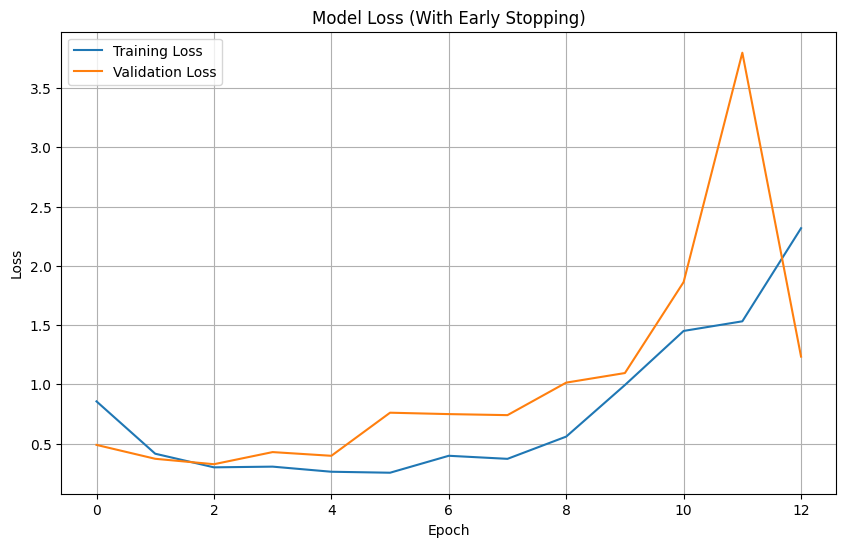

In [16]:
# Plotting loss for the model with early stopping
plt.figure(figsize=(10, 6))
plt.plot(history_with_es.history['loss'], label='Training Loss')
plt.plot(history_with_es.history['val_loss'], label='Validation Loss')
plt.title('Model Loss (With Early Stopping)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

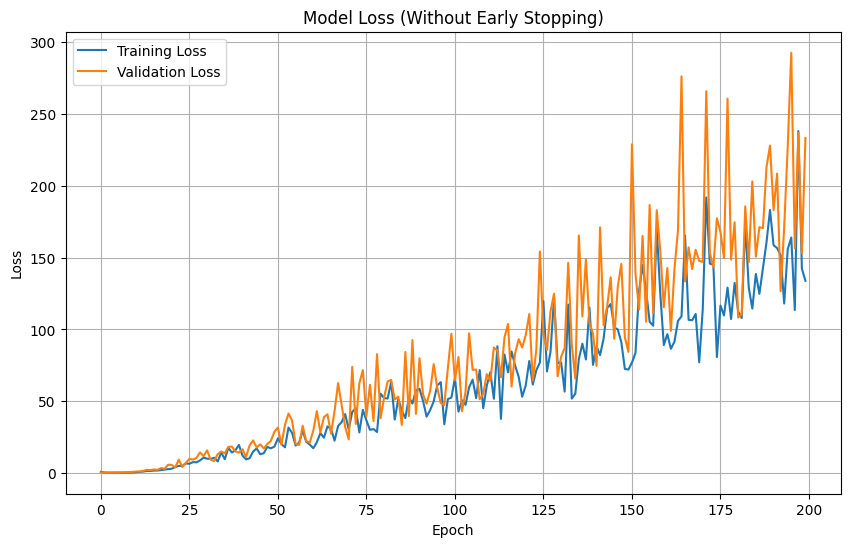

In [20]:
# Plotting loss for the model without early stopping
plt.figure(figsize=(10, 6))
plt.plot(history_no_es.history['loss'], label='Training Loss')
plt.plot(history_no_es.history['val_loss'], label='Validation Loss')
plt.title('Model Loss (Without Early Stopping)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid()
plt.show()